# Insights from the Annual StackOverflow Developer Survey | 2016-2020

**Stack Overflow** is a question and answer site for professional and enthusiast programmers. It is a privately held website, the flagship site of the Stack Exchange Network, created in 2008 by Jeff Atwood and Joel Spolsky.It features questions and answers on a wide range of topics in computer programming.It was created to be a more open alternative to earlier question and answer sites such as Experts-Exchange.

Every year Stack Overflow asks the developer community about everything from their favorite technologies to their job preferences. 

The [Annual Developer Survey](https://insights.stackoverflow.com/survey) results have been made available on kaggle on which people can do analysis.


### Business Understanding
For this project, I am interested to understand the following business scenarios,

1. Which are the top 5 countries with the most no. of developers in the last 5 Years (2016-2020)?
2. Which are the top 5 most popular language trends among the developer community in the last 5 years (2016-2020)?
3. What is the relationship between age and compensation of the developers across the various gender categories?
4. What are the responses of some of the common categorical questions in the survey?

I will be doing some exploratory analysis of the Annual Stack Overflow Developer Survey for the last 5 years (2016-2020).

###### Import the needed packages

In [114]:
import glob
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
sns.color_palette("vlag", as_cmap=True)

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Firstly, we will read all the data file year-wise to derive the consolidated results,

In [37]:
# Initializations
path = "./data/"
all_files = glob.glob(os.path.join(path, "*.csv"))
years = [str(i) for i in np.arange(2016, 2021, 1)]

### Data Understanding
###### A Look at the Data


In [40]:
# Let us take a sneak into the data
survey_df_2020.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


 #####  Find matching columns

In [115]:
# Function to sub-string search the column we are interested in.
def search_column(df, search_string):
    '''
    INPUT:
    df - the pandas dataframe in which column is searched
    search_string - a matching string/sub-string to search for in the dataset
    
    OUTPUT:
    related_columns - a list of columns containing the string you want to find
    '''
    column_list = list(df.columns)    
    
    return "\n".join(s for s in column_list if search_string.lower() in s.lower())

In [116]:
# Search for columns with sub-strings to reduce manual search in the dataframe
column_to_search = search_column(survey_df_2020, 'lang')
print("Matched columns in the dataset are,", end = "\n\n")
print(column_to_search)


Matched columns in the dataset are,

LanguageDesireNextYear
LanguageWorkedWith


##### Gather necessary data - Preparing dataframes

In [117]:
# Create survery results dictionary to store the combined data across 5 years
survey_results = {}
for file in all_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    year = file_name.split('_')[-1]
    survey_results[year] = pd.read_csv(path + file_name + '.csv', low_memory=False)

In [118]:
# Create individual dataframes for every year

'''exec is used to parse strings into commands & execute them dynamically.
It would allow to create these scalar variable names as per your requirement instead of using a dict. '''

for year in years:
    exec("survey_df_" + str(year) + "=pd.DataFrame.from_dict(survey_results[year])")

### Exploratory Analysis

##### Handle categorical and missing data
* **Dropping null values:** Missing data in the dataframes prepared for evaluating results are removed since are only interested in the top 5 most popular items (sorted by number of developers). Removing these datapoints will not affect the result too much. In these cases, a feasibility study was done by imputing the mean or mode of the column and it was observed that since the proportion of data avaialbility across years for some columns were high, the imputation yields inaccurate results in the final evaluation.

* **Imputation methods:** In some cases, we have performed imputation of the missing data with the mean() of the column and this imputation has not affected the final results much.

### Data Modeling

There is no data modelling and machine learning methods involved with this analysis, since the derived insights are more trivial and striaghtforward.

#####  1. Which are the top 5 countries with the most no. of developers in the last 5 Years (2016-2020)?



In [43]:
# Function to group-by the results of total developers country-wise
def countries_with_max_developers(data, key):
    '''Input: dataframe for each year's dataset and the corresponding year
       Output: country with the most number of developers and the value
    '''
    return pd.DataFrame(data[key].str.replace(" ", "").value_counts().rename(year))

In [44]:
# Build the dict to hold the results of the country wise developer breakdown count
country_developers = dict()

for year in years:
    exec("df=" + "survey_df_" + str(year))
    if year == '2016':
        key = 'country'
    else:
        key = 'Country'
    country_developers[year] = countries_with_max_developers(df, key)

In [45]:
# Merge all the dictionary data into a single dataframe
country_merge = pd.DataFrame()
for i in country_developers:
    try:
        country_merge = pd.merge(country_merge.reset_index(), country_developers[i].reset_index(), how = 'outer')
    except:
        country_merge = pd.merge(country_merge, country_developers[i].reset_index(), how = 'outer')
country_merge.drop('level_0', inplace = True, axis = 1)
country_merge.set_index('index', inplace = True)

In [59]:
# The misisng values are imputed with the mean() of the column in this case
country_merge = country_merge.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'float64'else x.fillna(0))

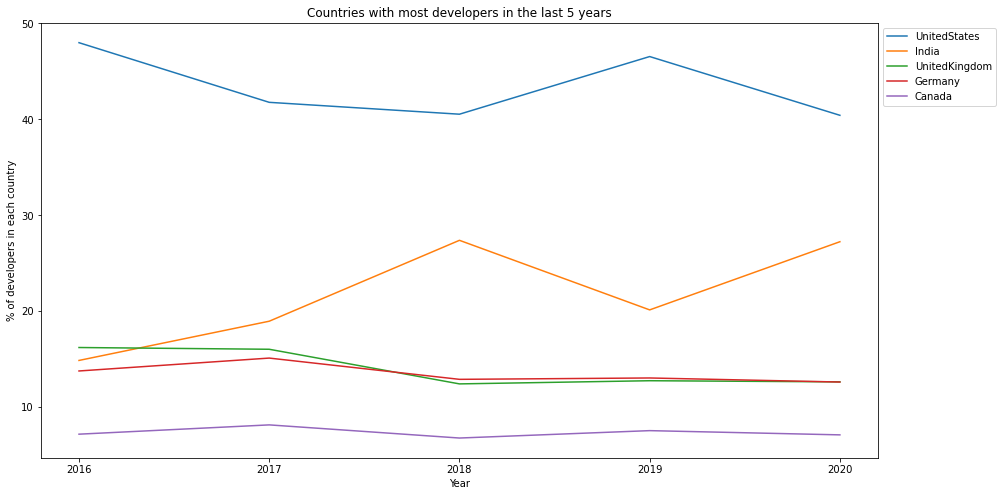

In [61]:
# # Visualize the top 5 countries with the most no. of developers for the period 2016-2020
country_merge = country_merge.loc[country_merge.sort_values(ascending = False, 
                                                                             by = '2020').head(5).index]
plt.figure(figsize = (15, 8))
plt.xlabel('Year')
plt.ylabel('% of developers in each country')
plt.title("Countries with most developers in the last 5 years")
for i in list(country_merge.T.columns):
    plt.plot((country_merge/country_merge.sum() *100).T.loc[:, i], label = i)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

*The Top countries with the highest percentage of the developers who had given the survey responses can be visualized in the above plot.*

1. There has been a clear step down in the percentage of developers in US, however it continues to remain the country 
    with the most developers.
    
2. India is showing a steady growth with the increase of developer count and emerge as the #2 country with most 
    developers.

#####  2. Which are the top 5 most popular language trends among the developer community in the last 5 years (2016-2020)?




In [72]:
# Function to fetch and build the structure for languages worked for each of the respective year.
def popular_languages(df, flag):
    
    """ Fetch all the programming language breakdown(count) for each of the respective year
        Input: dict
        Output: languages merged dataframe for all the 5 years
    """
    technology = {}
    
    # Switch the columns as per currently working or desired to work languages
    if flag == 'current':
        lang_2016 = 'tech_do'
        lang_2017 = 'HaveWorkedLanguage'
        lang_common = 'LanguageWorkedWith'
    elif flag == 'desired':
        lang_2016 = 'tech_want'
        lang_2017 = 'WantWorkLanguage'
        lang_common = 'LanguageDesireNextYear'

        
        
    
    technology['2016'] = pd.DataFrame(df['2016'][lang_2016].str.replace(" ", "").str
                                    .split(";", expand=True)
                                    .stack().reset_index(drop=True, level=1)
                                    .value_counts().rename('2016'))  

    technology['2017'] = pd.DataFrame(df['2017'][lang_2017].str.replace(" ", "").str
                                    .split(";", expand=True)
                                    .stack().reset_index(drop=True, level=1)
                                    .value_counts().rename('2017'))

    technology['2018'] = pd.DataFrame(df['2018'][lang_common].str.replace(" ", "").str
                                    .split(";", expand=True)
                                    .stack().reset_index(drop=True, level=1)
                                    .value_counts().rename('2018'))

    technology['2019'] = pd.DataFrame(df['2019'][lang_common].str.replace(" ", "")
                                           .str.split(";", expand=True)
                                           .stack().reset_index(drop=True, level=1)
                                           .value_counts().rename('2019'))
    
    technology['2020'] = pd.DataFrame(df['2020'][lang_common].str.replace(" ", "")
                                           .str.split(";", expand=True)
                                           .stack().reset_index(drop=True, level=1)
                                           .value_counts().rename('2020'))
    
  # Join all the value count breakdowns into a single dataframe, keeping all the entries
    technology_merge = pd.DataFrame()
    for year in technology:
        try:
            technology_merge = pd.merge(technology_merge.reset_index(), technology[year].reset_index(), how = 'outer')
        except:
            technology_merge = pd.merge(technology_merge, technology[year].reset_index(), how = 'outer')
    technology_merge.drop('level_0', inplace = True, axis = 1)
    technology_merge.set_index('index', inplace=True)
    
    return technology_merge

In [97]:
# Pass the consolidated dataframe to process and transform the language data to plot the current languages
technology_current_df = popular_languages(survey_results, "current")

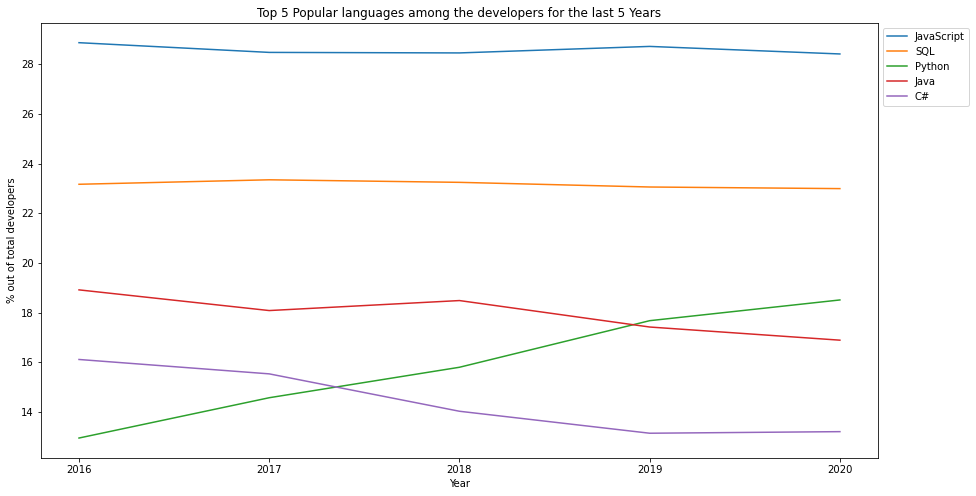

In [102]:
# Graph Plot for the most popular languages for the last 5 years
# The misisng values are dropped in this case as imputing the data with mean or mode yields inaccurate results
technology_current = technology_current_df.dropna().loc[technology_current_df.dropna().sort_values(ascending = False, 
                                                                             by = '2020').head(5).index]
plt.figure(figsize = (15, 8))
for i in list(technology_current.dropna().T.columns):
    plt.plot((technology_current/technology_current.sum() *100).T.loc[:, i], label = i)
plt.xlabel('Year')
plt.ylabel('% out of total developers')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Top 5 Popular languages among the developers for the last 5 Years")
plt.show()

*The Top languages worked in the last 5 years (2016-2020) by the developers who had given the survey responses can be visualized in the above graph plot.*

   1. There has been a clear down trend for Java and C# over the last 5 years, while Python has gained the popularity and emrged as the #3rd most popular language among all.
    
   2. JavaScript and SQL maintain a steady pace throughout the span of 5 years and continue to hold their #1 and #2 positions respectively.
 

In [110]:
# Pass the consolidated dataframe to process and transform the language data to plot the desired languages 
technology_desired_df = popular_languages(survey_results, "desired")

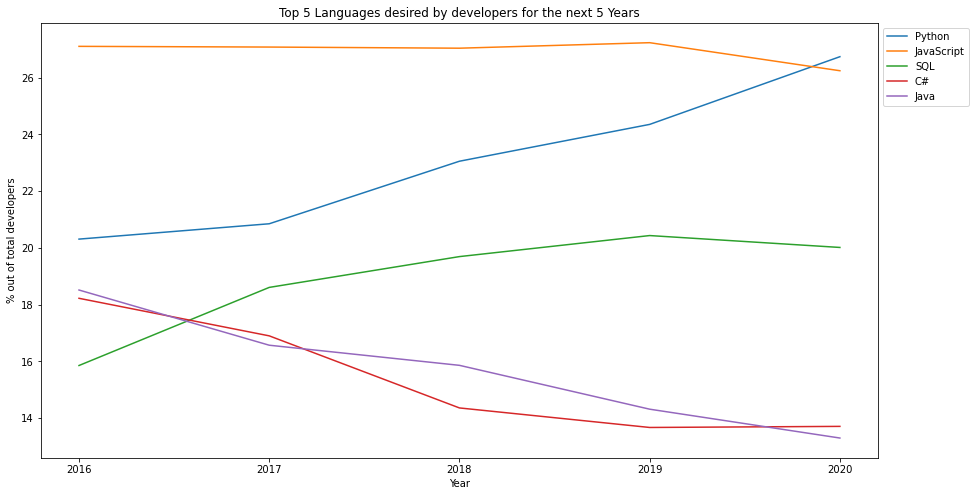

In [112]:
# Graph Plot for the languages desired by developers for the next 5 Years
# The misisng values are dropped in this case as imputing the data with mean or mode yields inaccurate results
technology_desired = technology_desired_df.dropna().loc[technology_desired_df.dropna().sort_values(ascending = False, 
                                                                             by = '2020').head(5).index]
plt.figure(figsize = (15, 8))
for i in list(technology_desired.dropna().T.columns):
    plt.plot((technology_desired/technology_desired.sum() *100).T.loc[:, i], label = i)
plt.xlabel('Year')
plt.ylabel('% out of total developers')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Top 5 Languages desired by developers for the next 5 Years")
plt.show()

*This analysis is an extension of the previous step, where the most desired languages among developers for the future trends can be visualized as shown in the above plot.*

   1. A very evident desire for python can be seen in the plot for the future surpassing all the other languages.

   2. There is also a further clear down trend for Java and C# in the future.
    
   3. SQL and JavaScript have just started to slightly lose momentum among the developers in the desired set of languages.

#####  3. What is the relationship between age and compensation of the developers across the various gender categories?

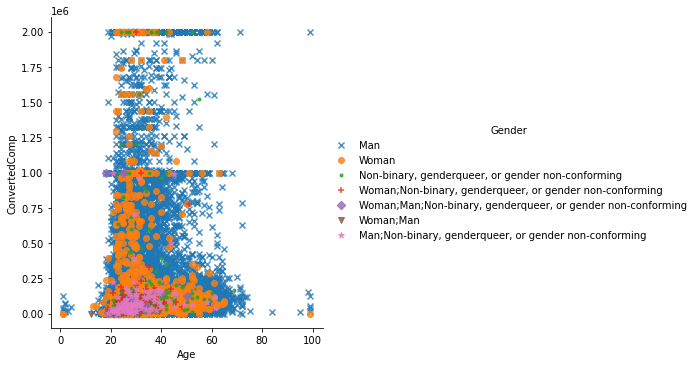

In [85]:
# Scatter Plot for Multi-variate representation for the relation of age and the compensation of the developers across the genders.
stack = survey_df_2019 # For illustration let us consider the survey results for the year 2019

sns.lmplot(x='Age', y='ConvertedComp', hue='Gender', 
           markers=['x', 'o', '.', '+', 'D', 'v', '*'],
           fit_reg=False, data=stack)

*The above scatter plot is a multi-variate visualization of Age VS Compensation across different genders. The plot does look little clumsy and difficult to read due to the several categories of gender present in this survey data. Let us simplify this plot by effective grouping of the genders.*

##### Perform data transformation and filtering


In [86]:
# The multiple categories in gender column can be grouped and simplified for better visual representation
Gender = []
for i in stack['Gender']:
    if (i=='Man') or (i== 'Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Male')
    elif (i=='Woman') or (i=='Woman;Non-binary, genderqueer, or gender non-conforming') or (i=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Female')
    else:
        Gender.append('LGBTQ')
stack['Gender_Grouping'] = Gender
stack['Gender_Grouping'] = stack['Gender_Grouping'].astype('category')

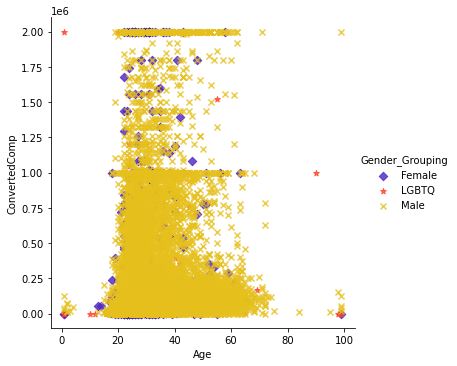

In [63]:
# Scatter Plot for Multi-variate representation
sns.lmplot(x='Age', y='ConvertedComp', hue='Gender_Grouping', 
           markers=['D', '*', 'x'], palette="CMRmap",
           fit_reg=False, data=stack)

*The above scatter plot simplifies the representation across only 3 genders for the Age VS Compensation breakdown.*

#####  4. What are the responses of some of the common categorical questions in the survey?

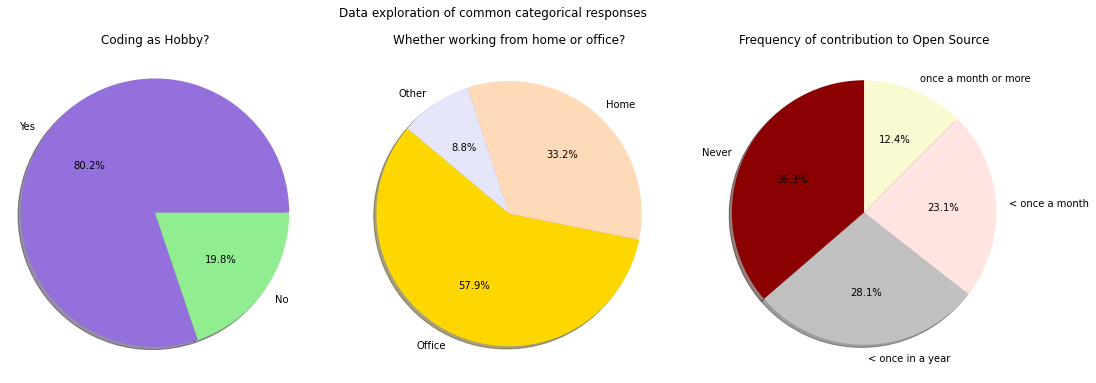

In [89]:
# Pie Chart representation for some of the commonly answered categorical questions in the developer survey
hobby = stack['Hobbyist'].value_counts()
remote =stack['WorkLoc'].value_counts()
contribution =stack['OpenSourcer'].value_counts()

colors1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = 2)
colors2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = 3)
colors3 = random.choices(list(mcolors.CSS4_COLORS.values()),k = 4)

labels1 = hobby.index
labels2 = 'Office', 'Home', 'Other'
labels3 = 'Never', '< once in a year', '< once a month', 'once a month or more'
  
sizes_ax1 = list(hobby)
sizes_ax2 = list(remote)
sizes_ax3 = list(contribution)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
ax1.pie(sizes_ax1, labels=labels1, colors=colors1,
        autopct='%1.1f%%', shadow=True, startangle=0)
ax1.axis('equal')
ax1.set_title('Coding as Hobby?')

ax2.pie(sizes_ax2, labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title('Whether working from home or office?')
           
ax3.pie(sizes_ax3, labels=labels3, colors=colors3,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('Frequency of contribution to Open Source')
f.suptitle('Data exploration of common categorical responses')
plt.show()

######  5. What are the health and food habit trends among the developer's lifestyle?

In [123]:
# Data preparation for the plotting in the aspect of exercise and meals
# For illustration let us consider the survey results for the year 2018
exercise = pd.DataFrame(survey_df_2018['Exercise'].value_counts().sort_values(ascending=False))
exercise.rename(index={"I don't typically exercise":"Never"},inplace=True)
skip_meals = pd.DataFrame(survey_df_2018['SkipMeals'].value_counts().sort_values(ascending=False))

# Convert the no of developers into percentage of developers
exercise = exercise/exercise.sum() * 100
skip_meals = skip_meals/skip_meals.sum() * 100

In [120]:
# Function to plot bar chart for the given aggregated dataframe.
def plot_bar_chart(df_plot, name, yaxis):
    """This function creates a bar plot for the provided dataframe
        
        Input: dataframe containing the plot data, title and y axis label name
        Output: returns None, plots the visualization
    """
    df_plot.plot(kind = 'bar', figsize = (10, 7),
                          title = name, colormap='Paired')
    plt.xticks(rotation = 45)
    plt.ylabel(yaxis)
    plt.show()

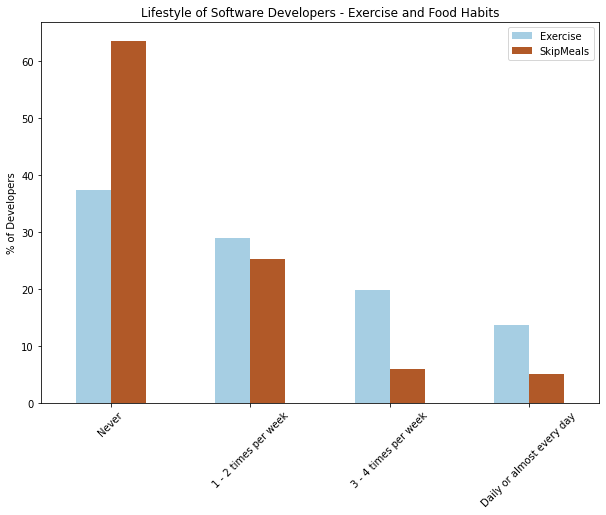

In [121]:
life_style = pd.DataFrame(exercise).join(pd.DataFrame(skip_meals))
plot_bar_chart(life_style, "Lifestyle of Software Developers - Exercise and Food Habits", "% of Developers")

### Evaluate the Results

The detailed insights of this analysis can be found at the medium post available in this [Medium Blog Post](https://annishprashanth.medium.com/what-does-the-developer-community-has-to-say-to-the-world-b02b90712b7b).

###  Conclusion


**Summary**

* In this notebook, various transformations and data plots are derived in order to arrive at the insights for the business motives defined in the starting of this project. 
* Both Uni-variate and Multi-variate visualization techniques are used for the data exploration.
* Handled 5 years survey data by means of effective consolidation and analysis.